## DAVID ZAGACETA HOMEWORK 2

1) Calculate and plot Fn/Fn-1 with n using memorization
method

In [1]:
def fib3(n, table):
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table)
        
    return table[n]

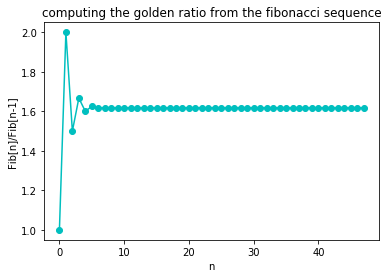

In [15]:
import matplotlib.pyplot as plt
n=50
table = [None]*(n+1)
Fn = []
for i in range(n):
    Fn.append(fib3(i,table))
phi = []
for i in range(n-2):
    phi.append(Fn[i+2]/Fn[i+1])

plt.plot(phi,'-oc')
plt.xlabel('n')
plt.ylabel('Fib[n]/Fib[n-1]')
plt.title('computing the golden ratio from the fibonacci sequence')
plt.show()

2 
    a) Use the iteration method, tabulation method, and
matrix method to calculate the time spent for different n
(e.g. 1, 10, 100, 1000, 10000, … uniform in the log
space).
b) For each method, output the time and n into a file
c) Read from the file and plot log(time) (y-axis) vs.
log(n) (x-axis) for different methods

In [3]:
# recursive method

def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [4]:
import time
recursive_time = []
N_recursive = []
for i in range(30):
    start_time = time.time()
    fib2(i+1)
    recursive_time.append(time.time() - start_time)
    N_recursive.append(i+1)

In [5]:
# tabulation method
def fib4(n):      # fast, no stack limit
    table=[0]*(n+1)
    table[1] = 1
    
    for i in range(2,n+1):
        table[i]=table[i-1]+table[i-2]
    return table[n]

In [6]:
import time
tabulation_time = []
N_tabulation = []
for i in range(5):
    start_time = time.time()
    fib4(10**(i+1))
    tabulation_time.append(time.time()- start_time)
    N_tabulation.append(10**(i+1))

In [7]:
# matrix method

def arrpow(arr, n): # calculate 2x2 array to the nth power.
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]], # array multiply itself
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:   # if n is an odd number, multiple another arr
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):   # the fastest method
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]  #0 0 component is Fn#
    return f

In [8]:
import time
matrix_time = []
N_matrix = []
for i in range(5):
    start_time = time.time()
    fib5(10**(i+1))
    matrix_time.append(time.time()-start_time)
    N_matrix.append(10**(i+1))

In [9]:
import os
os.getcwd()

'C:\\Users\\david\\phys404-work\\computational-physics-class-404-604-Spring-2018'

In [10]:
from numpy import savetxt
savetxt('recursive_time.csv',(N_recursive,recursive_time),delimiter=',')
savetxt('tabulation_time.csv',(N_tabulation,tabulation_time),delimiter=',')
savetxt('matrix_time.csv',(N_matrix,matrix_time),delimiter=',')

In [11]:
from numpy import loadtxt
recursive = loadtxt('recursive_time.csv',delimiter=',')
tabulation = loadtxt('tabulation_time.csv',delimiter=',')
matrix = loadtxt('matrix_time.csv',delimiter=',')

c:\users\david\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


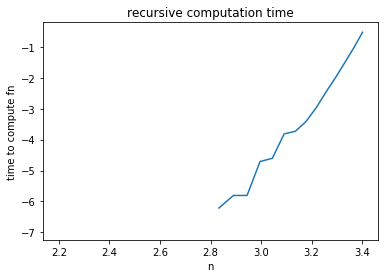

In [16]:
from numpy import log
plt.plot(log(recursive[0]),log(recursive[1]))
plt.xlabel('n')
plt.ylabel('time to compute fn')
plt.title('recursive computation time')
plt.show()

c:\users\david\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


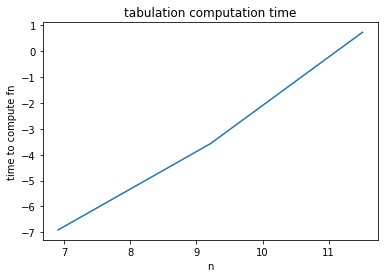

In [17]:
plt.plot(log(tabulation[0]),log(tabulation[1]))
plt.xlabel('n')
plt.ylabel('time to compute fn')
plt.title('tabulation computation time')
plt.show()

c:\users\david\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


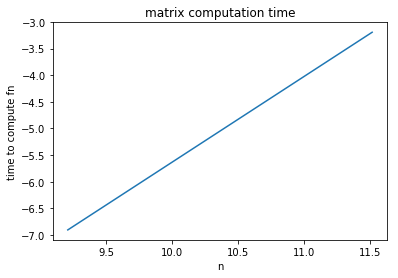

In [18]:
plt.plot(log(matrix[0]),log(matrix[1]))
plt.xlabel('n')
plt.ylabel('time to compute fn')
plt.title('matrix computation time')
plt.show()